In [27]:
import numpy as np
np.random.seed(999999)
target_distr = np.random.rand(2)
# We now convert the random vector into a valid probability vector
target_distr /= sum(target_distr)

In [28]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
def get_var_form(params):
    qr = QuantumRegister(1, name="q")
    cr = ClassicalRegister(1, name='c')
    qc = QuantumCircuit(qr, cr)
    qc.u3(params[0], params[1], params[2], qr[0])
    qc.measure(qr, cr[0])
    return qc

In [29]:
from qiskit import Aer, transpile, assemble
backend = Aer.get_backend("qasm_simulator")
NUM_SHOTS = 10000

def get_probability_distribution(counts):
    output_distr = [v / NUM_SHOTS for v in counts.values()]
    if len(output_distr) == 1:
        output_distr.append(1 - output_distr[0])
    return output_distr

def objective_function(params):
    # Obtain a quantum circuit instance from the parameters
    qc = get_var_form(params)
    # Execute the quantum circuit to obtain the probability distribution associated with the current parameters
    t_qc = transpile(qc, backend)
    qobj = assemble(t_qc, shots=NUM_SHOTS)
    result = backend.run(qobj).result()
    # Obtain the counts for each measured state, and convert those counts into a probability vector
    output_distr = get_probability_distribution(result.get_counts(qc))
    # Calculate the cost as the distance between the output distribution and the target distribution
    cost = sum([np.abs(output_distr[i] - target_distr[i]) for i in range(2)])
    return cost

In [30]:
# from qiskit.aqua.components.optimizers import COBYLA
from qiskit.algorithms.optimizers import COBYLA

# Initialize the COBYLA optimizer
optimizer = COBYLA(maxiter=500, tol=0.0001)

# Create the initial parameters (noting that our single qubit variational form has 3 parameters)
params = np.random.rand(3)
ret = optimizer.optimize(num_vars=3, objective_function=objective_function, initial_point=params)

# Obtain the output distribution using the final parameters
qc = get_var_form(ret[0])
t_qc = transpile(qc, backend)
qobj = assemble(t_qc, shots=NUM_SHOTS)
counts = backend.run(qobj).result().get_counts(qc)
output_distr = get_probability_distribution(counts)

print("Target Distribution:", target_distr)
print("Obtained Distribution:", output_distr)
print("Output Error (Manhattan Distance):", ret[1])
print("Parameters Found:", ret[0])

/tmp/ipykernel_1505/2737664276.py:6: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(params[0], params[1], params[2], qr[0])


Target Distribution: [0.51357006 0.48642994]
Obtained Distribution: [0.4794, 0.5206]
Output Error (Manhattan Distance): 0.043740118738839096
Parameters Found: [1.59239522 1.05013296 0.66776175]


In [31]:
from qiskit.circuit.library import EfficientSU2
entanglements = ["linear", "full"]
for entanglement in entanglements:
    form = EfficientSU2(num_qubits=4, entanglement=entanglement)
    if entanglement == "linear":
        print("=============Linear Entanglement:=============")
    else:
        print("=============Full Entanglement:=============")
    # We initialize all parameters to 0 for this demonstration
    display(form.draw(fold=100))
    print()

=============Linear Entanglement:=============


»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                                                                     ├
«     │                                                                                                                                                                                                      │
«q_1: ┤1                                                                                                                                                                                                     ├
«     │  EfficientSU2(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11],θ[12],θ[13],θ[14],θ[15],θ[16],θ[17],θ[18],θ[19],θ[20],θ[21],θ[22],θ[23],θ[24],θ[25],θ[26],θ[27],θ[28],θ[29],θ[30],θ[31]) │
«q_2: ┤2                                                                                                                                                                                                     ├
«     │                                                                                                                                                                                                      │
«q_3: ┤3                                                                                                                                                                                                     ├
«     └──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘


=============Full Entanglement:=============


»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                                                                     ├
«     │                                                                                                                                                                                                      │
«q_1: ┤1                                                                                                                                                                                                     ├
«     │  EfficientSU2(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11],θ[12],θ[13],θ[14],θ[15],θ[16],θ[17],θ[18],θ[19],θ[20],θ[21],θ[22],θ[23],θ[24],θ[25],θ[26],θ[27],θ[28],θ[29],θ[30],θ[31]) │
«q_2: ┤2                                                                                                                                                                                                     ├
«     │                                                                                                                                                                                                      │
«q_3: ┤3                                                                                                                                                                                                     ├
«     └──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [32]:
from qiskit.algorithms import VQE, NumPyEigensolver
import matplotlib.pyplot as plt
import numpy as np
from qiskit_nature.circuit.library import UCCSD, HartreeFock
# from qiskit.chemistry.components.initial_states import HartreeFock
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import COBYLA, SPSA, SLSQP, L_BFGS_B
from qiskit.opflow.primitive_ops import Z2Symmetries
from qiskit import IBMQ, BasicAer, Aer
from qiskit_nature.drivers.second_quantization import PySCFDriver
from qiskit_nature.drivers import UnitsType
from qiskit_nature.operators.second_quantization import FermionicOp as FermionicOperator
# from qiskit.chemistry import FermionicOperator
from qiskit.utils import QuantumInstance
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter
from qiskit.providers.aer.noise import NoiseModel

In [34]:
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureDriverType,
    ElectronicStructureMoleculeDriver,
)

molecule = Molecule(
    geometry=[["H", [0.0, 0.0, 0.0]], ["H", [0.0, 0.0, 0.5]]], charge=0, multiplicity=1
)
driver = ElectronicStructureMoleculeDriver(
    molecule, basis="sto3g", driver_type=ElectronicStructureDriverType.PYSCF
)
mol_res = driver.run()
print(mol_res.get_property("ElectronicEnergy").nuclear_repulsion_energy)
repul_energy = mol_res.get_property("ElectronicEnergy").nuclear_repulsion_energy

1.05835442184


In [35]:
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper

In [36]:
es_problem = ElectronicStructureProblem(driver)
second_q_op = es_problem.second_q_ops()
# print(second_q_op[0])
print(es_problem.num_particles)
print(es_problem.num_spin_orbitals)
n_qubits = es_problem.num_spin_orbitals

(1, 1)
4


In [37]:
qubit_converter = QubitConverter(mapper=JordanWignerMapper())
hamiltonian = second_q_op[0]
qubit_op = qubit_converter.convert(hamiltonian)
print(qubit_op)

0.04221755692243387 * YYYY
+ 0.04221755692243387 * XXYY
+ 0.04221755692243387 * YYXX
+ 0.04221755692243387 * XXXX
- 0.6785230700590462 * IIII
- 0.36914431524376634 * ZIII
+ 0.21393531024521267 * IZII
+ 0.13459240346368856 * ZZII
- 0.3691443152437663 * IIZI
+ 0.18620984259247142 * ZIZI
+ 0.17680996038612246 * IZZI
+ 0.21393531024521273 * IIIZ
+ 0.17680996038612246 * ZIIZ
+ 0.17992650976405983 * IZIZ
+ 0.13459240346368856 * IIZZ


In [38]:
from qiskit.circuit import ParameterVector

nqubits = 4 ########################################

qc = QuantumCircuit(nqubits)

r = 4
# theta = np.random.random(2*nqubits*r)*1e-1
# theta = []
# for i in range(r*2*nqubits): theta.append(0.1)
# theta = np.array(theta)

theta = ParameterVector('p',2*nqubits*r)

t = 0
for i in range(r):   
    for j in range(nqubits // 2):
        qc.ry(theta[t+2*j], j)
        qc.rz(theta[t+2*j+1], j)

    if i < r-1: 
        for j in range(nqubits // 2-1):
            qc.cnot(j, (j+1))
        qc.cnot(nqubits//2-1, 0)
    t += nqubits

t = int(len(theta)/2)
for i in range(r):   
    for j in range(nqubits // 2):
        qc.ry(theta[t+2*j], j+nqubits//2)
        qc.rz(theta[t+2*j+1], j+nqubits//2)
    if i < r-1: 
        for j in range(nqubits//2, nqubits-1):
            qc.cnot(j, j+1)
        qc.cnot(nqubits-1, nqubits//2)
    t += nqubits

# qc.measure_all()
qc.draw()


┌──────────┐ ┌──────────┐     ┌───┐ ┌──────────┐ ┌──────────┐     ┌───┐»
q_0: ─┤ Ry(p[0]) ├─┤ Rz(p[1]) ├──■──┤ X ├─┤ Ry(p[4]) ├─┤ Rz(p[5]) ├──■──┤ X ├»
      ├──────────┤ ├──────────┤┌─┴─┐└─┬─┘ ├──────────┤ ├──────────┤┌─┴─┐└─┬─┘»
q_1: ─┤ Ry(p[2]) ├─┤ Rz(p[3]) ├┤ X ├──■───┤ Ry(p[6]) ├─┤ Rz(p[7]) ├┤ X ├──■──»
     ┌┴──────────┤┌┴──────────┤└───┘┌───┐┌┴──────────┤┌┴──────────┤└───┘┌───┐»
q_2: ┤ Ry(p[16]) ├┤ Rz(p[17]) ├──■──┤ X ├┤ Ry(p[20]) ├┤ Rz(p[21]) ├──■──┤ X ├»
     ├───────────┤├───────────┤┌─┴─┐└─┬─┘├───────────┤├───────────┤┌─┴─┐└─┬─┘»
q_3: ┤ Ry(p[18]) ├┤ Rz(p[19]) ├┤ X ├──■──┤ Ry(p[22]) ├┤ Rz(p[23]) ├┤ X ├──■──»
     └───────────┘└───────────┘└───┘     └───────────┘└───────────┘└───┘     »
«      ┌──────────┐ ┌──────────┐     ┌───┐┌───────────┐┌───────────┐
«q_0: ─┤ Ry(p[8]) ├─┤ Rz(p[9]) ├──■──┤ X ├┤ Ry(p[12]) ├┤ Rz(p[13]) ├
«     ┌┴──────────┤┌┴──────────┤┌─┴─┐└─┬─┘├───────────┤├───────────┤
«q_1: ┤ Ry(p[10]) ├┤ Rz(p[11]) ├┤ X ├──■──┤ Ry(p[14]) ├┤ Rz(p[15]) ├
«     ├───────────┤├───────────┤└───┘┌───┐├───────────┤├───────────┤
«q_2: ┤ Ry(p[24]) ├┤ Rz(p[25]) ├──■──┤ X ├┤ Ry(p[28]) ├┤ Rz(p[29]) ├
«     ├───────────┤├───────────┤┌─┴─┐└─┬─┘├───────────┤├───────────┤
«q_3: ┤ Ry(p[26]) ├┤ Rz(p[27]) ├┤ X ├──■──┤ Ry(p[30]) ├┤ Rz(p[31]) ├
«     └───────────┘└───────────┘└───┘     └───────────┘└───────────┘

In [39]:
hamiltonian

FermionicOp([('+_0 -_1 +_2 -_3', (0.1688702276897358+0j)), ('+_0 -_1 -_2 +_3', (-0.16887022768973556+0j)), ('-_0 +_1 +_2 -_3', (-0.16887022768973556+0j)), ('-_0 +_1 -_2 +_3', (0.16887022768973498+0j)), ('+_3...)], register_length=4, display_format='sparse')

In [40]:
# np_op = hamiltonian.mapping(map_type='parity', threshold=0.00000001)
from qiskit_optimization.algorithms import (
    MinimumEigenOptimizer,
    RecursiveMinimumEigenOptimizer,
    SolutionSample,
    OptimizationResultStatus,
)
# np.linalg.eigvals

from scipy.sparse.linalg import eigsh

mat = hamiltonian.to_matrix(sparse=True)
# print(mat)

exact_energy = eigsh(mat)[0][0] + repul_energy
exact_energy


-1.0551597944706244

In [41]:
# exact_sol = NumPyEigensolver()
# exact = MinimumEigenOptimizer(exact_sol)

# exact_result = exact.solve(mat)

In [42]:
# define your backend or quantum instance (where you can add settings)
backend = Aer.get_backend('qasm_simulator') 
q_instance = QuantumInstance(backend, shots=1024)

# define the state to sample
# measurable_expression = StateFn(op, is_measurement=True).compose(psi) 
optimizer = COBYLA(maxiter=200)
vqe = VQE(ansatz=qc, optimizer=optimizer, initial_point=np.random.random(2*nqubits*r)*1e-1, quantum_instance=q_instance)
# def get_expectation()
vqe_result = vqe.compute_minimum_eigenvalue(qubit_op)


In [51]:
print(exact_energy)
vqe_result.eigenvalue + repul_energy

-0.9543388539987316


(-1.8081568502212024+0j)

In [99]:
from qiskit.circuit.library import EfficientSU2

def get_H2_hamiltonian(d):
    molecule = Molecule(
        geometry=[["H", [0.0, 0.0, 0.0]], ["H", [0.0, 0.0, d]]], charge=0, multiplicity=1
    )
    driver = ElectronicStructureMoleculeDriver(
        molecule, basis="sto3g", driver_type=ElectronicStructureDriverType.PYSCF
    )
    mol_res = driver.run()
    # print(mol_res.get_property("ElectronicEnergy").nuclear_repulsion_energy)
    repul_energy = mol_res.get_property("ElectronicEnergy").nuclear_repulsion_energy
    es_problem = ElectronicStructureProblem(driver)
    second_q_op = es_problem.second_q_ops()
    # print(second_q_op[0])
    # print(es_problem.num_particles)
    # print(es_problem.num_spin_orbitals)
    n_qubits = es_problem.num_spin_orbitals
    qubit_converter = QubitConverter(mapper=JordanWignerMapper())
    hamiltonian = second_q_op[0]
    # qubit_op = qubit_converter.convert(hamiltonian)
    return hamiltonian, repul_energy, n_qubits

def create_sep_circ(nqubits, r=None):
    # nqubits = 4 ########################################
    if not r:
        r = nqubits

    qc = QuantumCircuit(nqubits)
    # r = 4
    # theta = np.random.random(2*nqubits*r)*1e-1
    # theta = []
    # for i in range(r*2*nqubits): theta.append(0.1)
    # theta = np.array(theta)

    theta = ParameterVector('p',2*nqubits*r)

    t = 0
    for i in range(r):   
        for j in range(nqubits // 2):
            qc.ry(theta[t+2*j], j)
            qc.rz(theta[t+2*j+1], j)

        if i < r-1: 
            for j in range(nqubits // 2-1):
                qc.cnot(j, (j+1))
            qc.cnot(nqubits//2-1, 0)
        t += nqubits

    t = int(len(theta)/2)
    for i in range(r):   
        for j in range(nqubits // 2):
            qc.ry(theta[t+2*j], j+nqubits//2)
            qc.rz(theta[t+2*j+1], j+nqubits//2)
        if i < r-1: 
            for j in range(nqubits//2, nqubits-1):
                qc.cnot(j, j+1)
            qc.cnot(nqubits-1, nqubits//2)
        t += nqubits

    # qc.measure_all()
    # qc.draw()
    return qc

def state_inspired_circ(nqubits):
    params = ParameterVector('theta', length=1)
    qc = QuantumCircuit(nqubits)
    qc.x([0, 2])
    qc.ry(params[0], 1)
    qc.cx(1, 0)
    qc.cx(1, 2)
    qc.cx(1, 3)
    return qc

def get_exact_res(hamiltonian, repul_energy):
    mat = hamiltonian.to_matrix(sparse=True)
    # print(mat)
    exact_energy = eigsh(mat)[0][0] + repul_energy
    return exact_energy

# def get_expect_val()

def get_vqe_res(nqubits, hamiltonian, repul_energy, shots=1024, backend=Aer.get_backend('statevector_simulator'), qc_tag="he_full", r=None):
    # define your backend or quantum instance (where you can add settings)
    # backend = Aer.get_backend('qasm_simulator')
    if not r: r = 5
    # print(r)
    q_instance = QuantumInstance(backend, shots=shots)
    if qc_tag == "he_full": qc = EfficientSU2(num_qubits=nqubits, entanglement="full", reps=r-1)
    if qc_tag == "sep_circ": qc = create_sep_circ(nqubits, r=r)
    # qc = create_sep_circ(nqubits, r=r)
    # qc = state_inspired_circ(nqubits)
    # qc = EfficientSU2(num_qubits=nqubits, entanglement="full")
    
    qubit_converter = QubitConverter(mapper=JordanWignerMapper())
    qubit_op = qubit_converter.convert(hamiltonian)
    # optimizer = COBYLA(maxiter=160)
    optimizer = L_BFGS_B(maxiter=120)
    # optimizer = SLSQP(maxiter=5)
    vqe = VQE(ansatz=qc, optimizer=optimizer, quantum_instance=q_instance, initial_point=np.random.random(2*nqubits*r)*1e-1) # 
    # vqe = VQE(ansatz=qc, optimizer=optimizer, initial_point=[0.], quantum_instance=q_instance)
    # print('vqe setup ok')
    vqe_result = vqe.compute_minimum_eigenvalue(qubit_op)
    # print(vqe_result)
    return vqe_result.eigenvalue.real + repul_energy

# qc = EfficientSU2(num_qubits=4, entanglement="linear")
# qc.decompose().draw()
# optimizer = SLSQP(maxiter=5)
# qc = state_inspired_circ(4)
# vqe = VQE(ansatz=qc, optimizer=optimizer, initial_point=[0.], quantum_instance=q_instance)
# vqe.construct_circuit()


In [91]:
distances = np.arange(0.5, 2.1, 0.1)
exact_energy_array = np.zeros(len(distances))
vqe_he_fully_energy_array = np.zeros(len(distances))
vqe_sep_circ_energy_array = np.zeros(len(distances))

for i, d in enumerate(distances):
    # print(d)
    hamiltonian, repul_energy, n_qubits = get_H2_hamiltonian(d)
    # print("ok")
    exact_energy = get_exact_res(hamiltonian, repul_energy)
    exact_energy_array[i] = exact_energy
    # print(hamiltonian)
    # print(exact_energy)
    vqe_he_fully_energy = get_vqe_res(n_qubits, hamiltonian, repul_energy, qc_tag="he_full")
    vqe_he_fully_energy_array[i] = vqe_he_fully_energy
    vqe_sep_circ_energy = get_vqe_res(n_qubits, hamiltonian, repul_energy, qc_tag="sep_circ")
    vqe_sep_circ_energy_array[i] = vqe_sep_circ_energy

    # print('-------')

print('distances: ', distances)
print('exact_energy_array: ', exact_energy_array)
print('vqe_he_fully_energy_array: ', vqe_he_fully_energy_array)
print('vqe_sep_circ_energy_array: ', vqe_sep_circ_energy_array)

distances:  [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
exact_energy_array:  [-1.05515979 -1.11628601 -1.13618945 -1.13414767 -1.12056028 -1.10115033
 -1.07919294 -1.05674075 -1.03518627 -1.01546825 -0.99814935 -0.98347273
 -0.97142669 -0.96181695 -0.95433885 -0.94864111]
vqe_he_fully_energy_array:  [-1.05510457 -1.11619468 -1.1354916  -1.12369318 -1.12025575 -0.7458682
 -0.79295153 -0.82840905 -0.8552344  -0.87542629 -0.89058293 -0.90191137
 -0.9103178  -0.91657116 -0.9211685  -0.92453727]
vqe_sep_circ_energy_array:  [-1.04299626 -1.1011279  -1.117349   -1.11085039 -1.09191392 -1.06610865
 -1.03653887 -1.00637251 -0.98402761 -0.96849129 -0.95770679 -0.95022791
 -0.94504223 -0.94144516 -0.93894813 -0.93721283]


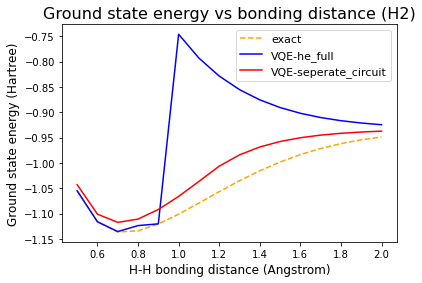

In [92]:
# plt.plot(d_array, E_rhf_list, "+", color="blue", label="RHF")
# plt.plot(d_array, E_mp2_list, "x", color="darkgreen", label="MP2")
# plt.plot(d_array, E_fci_list, "*", color="indigo", label="FCI")
##------------##
plt.plot(distances, exact_energy_array, "--", color="orange", label="exact")
plt.plot(distances, vqe_he_fully_energy_array, "-", color="blue", label="VQE-he_full")
plt.plot(distances, vqe_sep_circ_energy_array, "-", color="red", label="VQE-seperate_circuit")

plt.title("Ground state energy vs bonding distance (H2)", fontsize=16)
plt.xlabel("H-H bonding distance (Angstrom)", fontsize=12)
plt.ylabel("Ground state energy (Hartree)", fontsize=12)
plt.legend(fontsize=11)
plt.show()

In [100]:
def get_LiH_hamiltonian(d):
    molecule = Molecule(
        geometry=[["Li", [0.0, 0.0, 0.0]], ["H", [0.0, 0.0, d]]], charge=0, multiplicity=1
    )
    driver = ElectronicStructureMoleculeDriver(
        molecule, basis="sto3g", driver_type=ElectronicStructureDriverType.PYSCF
    )
    mol_res = driver.run()
    # print(mol_res.get_property("ElectronicEnergy").nuclear_repulsion_energy)
    repul_energy = mol_res.get_property("ElectronicEnergy").nuclear_repulsion_energy
    es_problem = ElectronicStructureProblem(driver)
    second_q_op = es_problem.second_q_ops()
    # print(second_q_op[0])
    # print(es_problem.num_particles)
    # print(es_problem.num_spin_orbitals)
    n_qubits = es_problem.num_spin_orbitals
    qubit_converter = QubitConverter(mapper=JordanWignerMapper())
    hamiltonian = second_q_op[0]
    # qubit_op = qubit_converter.convert(hamiltonian)
    return hamiltonian, repul_energy, n_qubits

In [104]:
distances_LiH = np.arange(0.5, 4.01, 0.1)
exact_energy_array_LiH = np.zeros(len(distances))
vqe_he_fully_energy_array_LiH = np.zeros(len(distances))
vqe_sep_circ_energy_array_LiH = np.zeros(len(distances))

for i, d in enumerate(distances):
    # print(d)
    hamiltonian, repul_energy, n_qubits = get_LiH_hamiltonian(d)
    # print("ok")
    # print(n_qubits)
    exact_energy = get_exact_res(hamiltonian, repul_energy)
    exact_energy_array_LiH[i] = exact_energy
    # print(hamiltonian)
    # print(exact_energy)
    vqe_he_fully_energy = get_vqe_res(n_qubits, hamiltonian, repul_energy, qc_tag="he_full")
    vqe_he_fully_energy_array_LiH[i] = vqe_he_fully_energy
    vqe_sep_circ_energy = get_vqe_res(n_qubits, hamiltonian, repul_energy, qc_tag="sep_circ")
    vqe_sep_circ_energy_array_LiH[i] = vqe_sep_circ_energy
    # break
    # print('-------')


print('distances: ', distances)
print('exact_energy_array_LiH: ', exact_energy_array_LiH)
print('vqe_he_fully_energy_array_LiH: ', vqe_he_fully_energy_array_LiH)
print('vqe_sep_circ_energy_array_LiH: ', vqe_sep_circ_energy_array_LiH)

distances:  [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
exact_energy_array_LiH:  [-7.05022504 -7.31931894 -7.50505177 -7.63416733 -7.72342372 -7.78446028
 -7.82553696 -7.85243085 -7.86913998 -7.87845365 -7.88236229 -7.88232438
 -7.87943352 -7.87452402 -7.86824079 -7.86108777]
vqe_he_fully_energy_array_LiH:  [-6.02816384 -6.72468786 -5.99158861 -6.78284133 -6.2958033  -5.96238738
 -5.95131091 -6.51273928 -6.64117546 -6.55168314 -6.94236949 -6.53925903
 -6.48465302 -7.29354729 -6.65954231 -5.85959978]
vqe_sep_circ_energy_array_LiH:  [-6.01104484 -6.43393879 -6.5451527  -6.47251476 -6.75835697 -6.59226853
 -6.28712955 -6.23706716 -6.07053628 -6.5476058  -6.8419992  -6.55418943
 -6.18844786 -6.24118005 -6.37365846 -6.49598222]


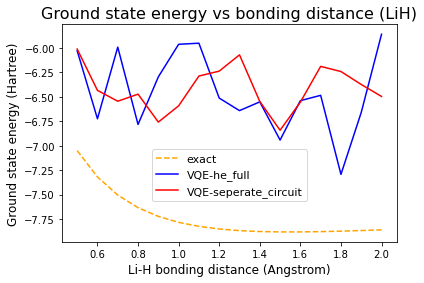

In [115]:
plt.plot(distances, exact_energy_array_LiH, "--", color="orange", label="exact")
plt.plot(distances, vqe_he_fully_energy_array_LiH, "-", color="blue", label="VQE-he_full")
plt.plot(distances, vqe_sep_circ_energy_array_LiH, "-", color="red", label="VQE-seperate_circuit")

plt.title("Ground state energy vs bonding distance (LiH)", fontsize=16)
plt.xlabel("Li-H bonding distance (Angstrom)", fontsize=12)
plt.ylabel("Ground state energy (Hartree)", fontsize=12)
# plt.legend(fontsize=11)
plt.legend(fontsize=11, loc='best', bbox_to_anchor=(0.5, 0.45))
plt.show()

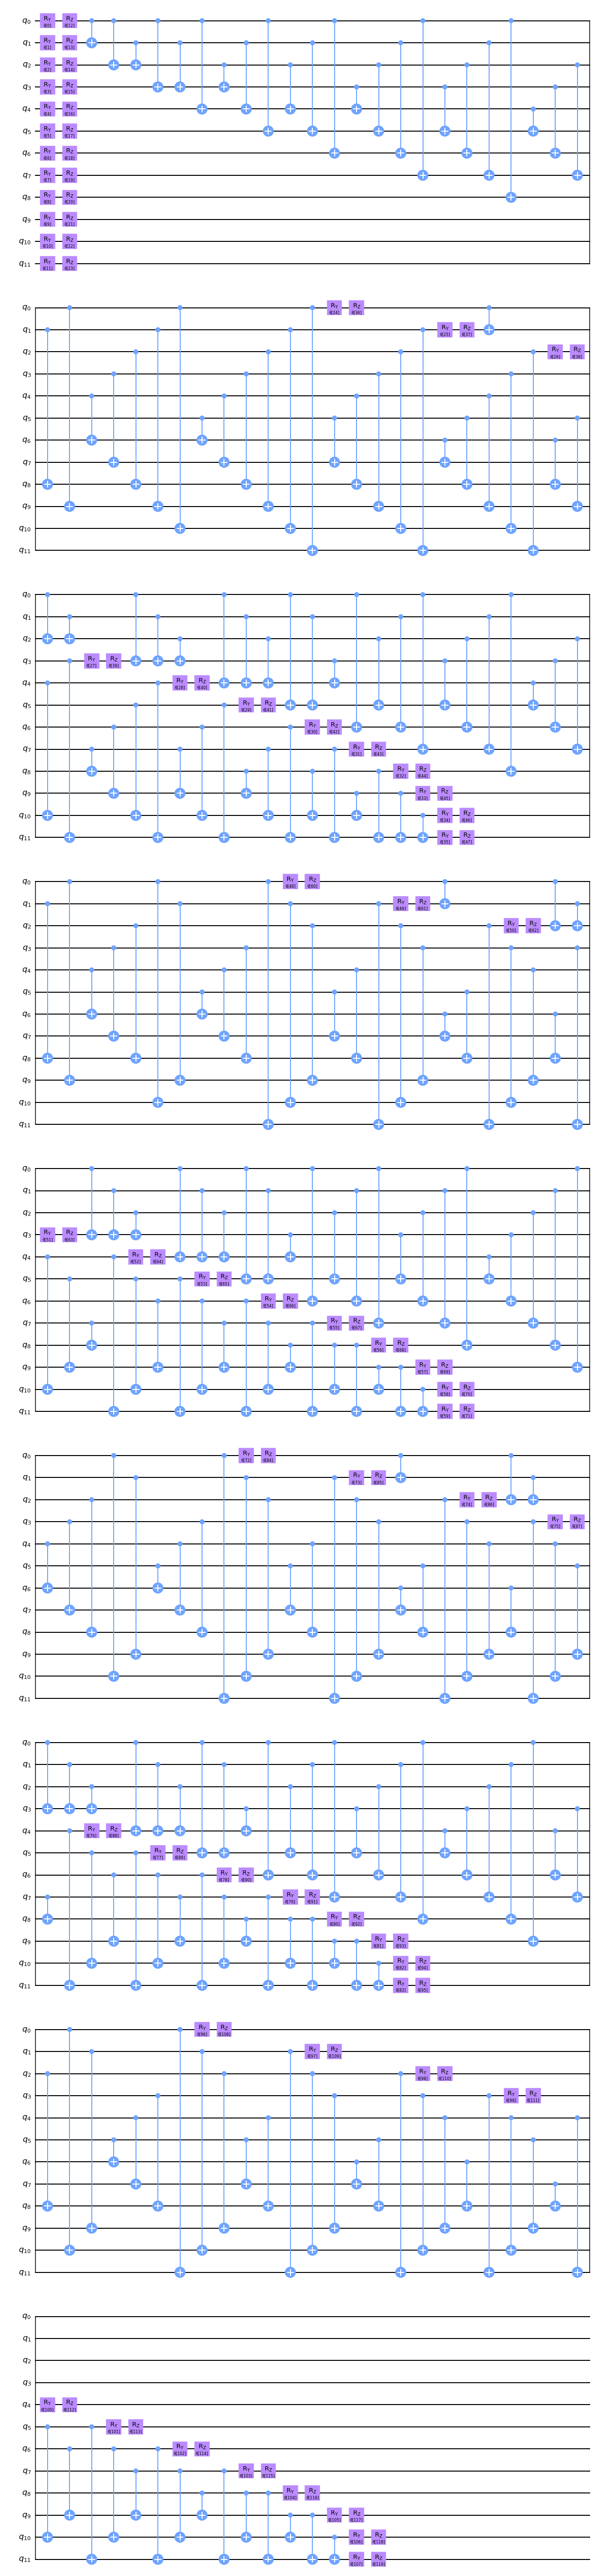

In [108]:
LiHqc = EfficientSU2(num_qubits=12, entanglement="full", reps=4)
LiHqc.decompose().draw(output='mpl')

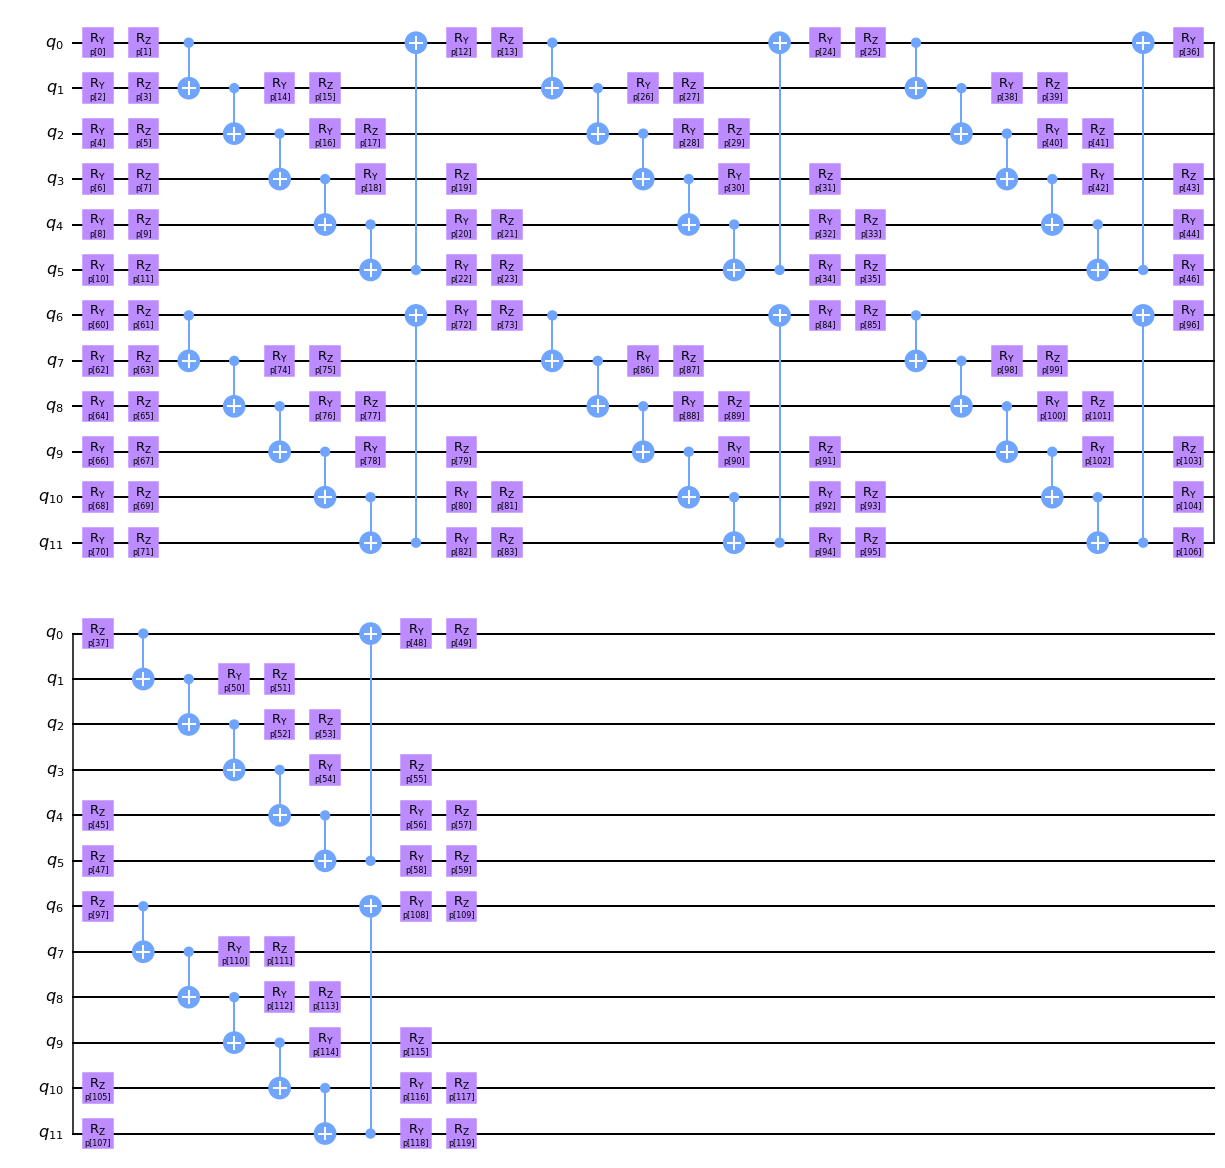

In [112]:
LiHsepqc = create_sep_circ(12, r=5)
LiHsepqc.draw(output='mpl')